In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import clear_output
import cv2
!pip3 install google-colab
from google.colab.patches import cv2_imshow
clear_output()

In [3]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r ./yolov5/requirements.txt
clear_output()

In [4]:

# !touch /content/yolov5/data/custom.yaml

# #Type The content in the aboove path
# """
# train: ../weapon_data/images/train/
# val:  ../weapon_data/images/val/
# test: ../weapon_data/images/test/
# # number of classes,
# nc: 1,
# # class names,
# names: ["weapon"]
# """

# my_file = open('/content/yolov5/data/custom.yaml','w+')
# my_file.write('train: ../weapon_data/images/train/ \nval:  ../weapon_data/images/val/ \ntest: ../weapon_data/images/test/ \n# number of classes \nnc: 1 \n# class names \nnames: ["weapon"]')

In [5]:

# my_file.readlines()

In [6]:
!pip install imageio
!pip install imutils
clear_output()

In [15]:
import random
from PIL import Image, ImageDraw
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import os
import glob
from imageio import imread
import cv2
from google.colab.patches import cv2_imshow
import imutils
import json

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

import torch
from IPython.display import Image
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# def move_files_to_folder(list_of_files, destination_folder):
#     for f in list_of_files:
#         try:
#             shutil.copy(f, destination_folder)
#         except:
#             print(f)
#             assert False

In [9]:

# !mkdir ./yolov5/weapon_data
# !mkdir ./yolov5/weapon_data/images ./yolov5/weapon_data/labels

# !mkdir ./yolov5/weapon_data/images/train ./yolov5/weapon_data/images/val ./yolov5/weapon_data/images/test ./yolov5/weapon_data/labels/train ./yolov5/weapon_data/labels/val ./yolov5/weapon_data/labels/test

In [16]:
originTrainImgs = "/content/drive/MyDrive/weapon_data/images/train/"
originTestImgs = "/content/drive/MyDrive/weapon_data/images/test/"
originValImgs = "/content/drive/MyDrive/weapon_data/images/val/"

originTrainLabls = "/content/drive/MyDrive/weapon_data/labels/train/"
originTestLabls = "/content/drive/MyDrive/weapon_data/labels/test/"
originValLabls = "/content/drive/MyDrive/weapon_data/labels/val/"

images = []
train_images = []
test_images = []
val_images = []

for fl in sorted(os.listdir(originTrainImgs)):
    images.append(originTrainImgs+fl)
    train_images.append(originTrainImgs+fl)
# move_files_to_folder(train_images, "./yolov5/weapon_data/images/train/")
for fl in sorted(os.listdir(originTestImgs)):
    images.append(originTestImgs+fl)
    test_images.append(originTestImgs+fl)
# move_files_to_folder(test_images, "./yolov5/weapon_data/images/test/")
for fl in sorted(os.listdir(originValImgs)):
    images.append(originValImgs+fl)
    val_images.append(originValImgs+fl)
# move_files_to_folder(val_images, "./yolov5/weapon_data/images/val/")

annotations = []
train_annotations = []
test_annotations = []
val_annotations = []

for fl in sorted(os.listdir(originTrainLabls)):
    annotations.append(originTrainLabls+fl)
    train_annotations.append(originTrainLabls+fl)
# move_files_to_folder(train_annotations, "./yolov5/weapon_data/labels/train/")
for fl in sorted(os.listdir(originTestLabls)):
    annotations.append(originTestLabls+fl)
    test_annotations.append(originTestLabls+fl)
# move_files_to_folder(test_annotations, "./yolov5/weapon_data/labels/test/")
# for fl in sorted(os.listdir(originValLabls)):
#     annotations.append(originValLabls+fl)
#     val_annotations.append(originValLabls+fl)
# move_files_to_folder(val_annotations, "/content/yolov5/weapon_data/labels/val")


In [17]:
!ls /content/drive/MyDrive/weapon_data/images/test/
print('--------------')
!ls /content/drive/MyDrive/weapon_data/labels/test/

'im16 (1).jpg'	'im2 (2).jpg'	 im31.jpg	 im45.jpg	'im64 (1).jpg'
'im16 (2).jpg'	 im2.jpg	'im33 (1).jpg'	'im61 (1).jpg'	 im64.jpg
 im16.jpg	'im31 (1).jpg'	 im33.jpg	 im61.jpg	 im66.jpg
'im2 (1).jpg'	'im31 (2).jpg'	'im45 (1).jpg'	 im62.jpg	 im9.jpg
--------------
im16.txt  im2.txt  im31.txt  im33.txt  im45.txt  im61.txt  im62.txt  im64.txt  im66.txt  im9.txt


In [18]:


labelsTrain = "/content/drive/MyDrive/weapon_data/labels/train/"
labelsTest = "/content/drive/MyDrive/weapon_data/labels/test/"
labelsVal = "/content/drive/MyDrive/weapon_data/labels/val/"


# for fl in sorted(os.listdir(labelsTrain)):
#     os.remove(labelsTrain+fl)

# for fl in sorted(os.listdir(labelsTest)):
#     os.remove(labelsTest+fl)

# for fl in sorted(os.listdir(labelsVal)):
#     os.remove(labelsVal+fl)


imgTrain = "/content/drive/MyDrive/weapon_data/images/train/"
imgTest = "/content/drive/MyDrive/weapon_data/images/test/"
imgVal = "/content/drive/MyDrive/weapon_data/images/val/"

# for fl in sorted(os.listdir(imgTrain)):
#     os.remove(imgTrain+fl)

# for fl in sorted(os.listdir(imgTest)):
#     os.remove(imgTest+fl)

# for fl in sorted(os.listdir(imgVal)):
#     os.remove(imgVal+fl)

In [19]:
def augmentFilesInDir(pathToDir):

    for fl in sorted(os.listdir(pathToDir)):
      continue


augmentFilesInDir(labelsTrain)
augmentFilesInDir(imgTrain)

augmentFilesInDir(labelsTest)
augmentFilesInDir(imgTest)

augmentFilesInDir(labelsVal)
augmentFilesInDir(imgVal)

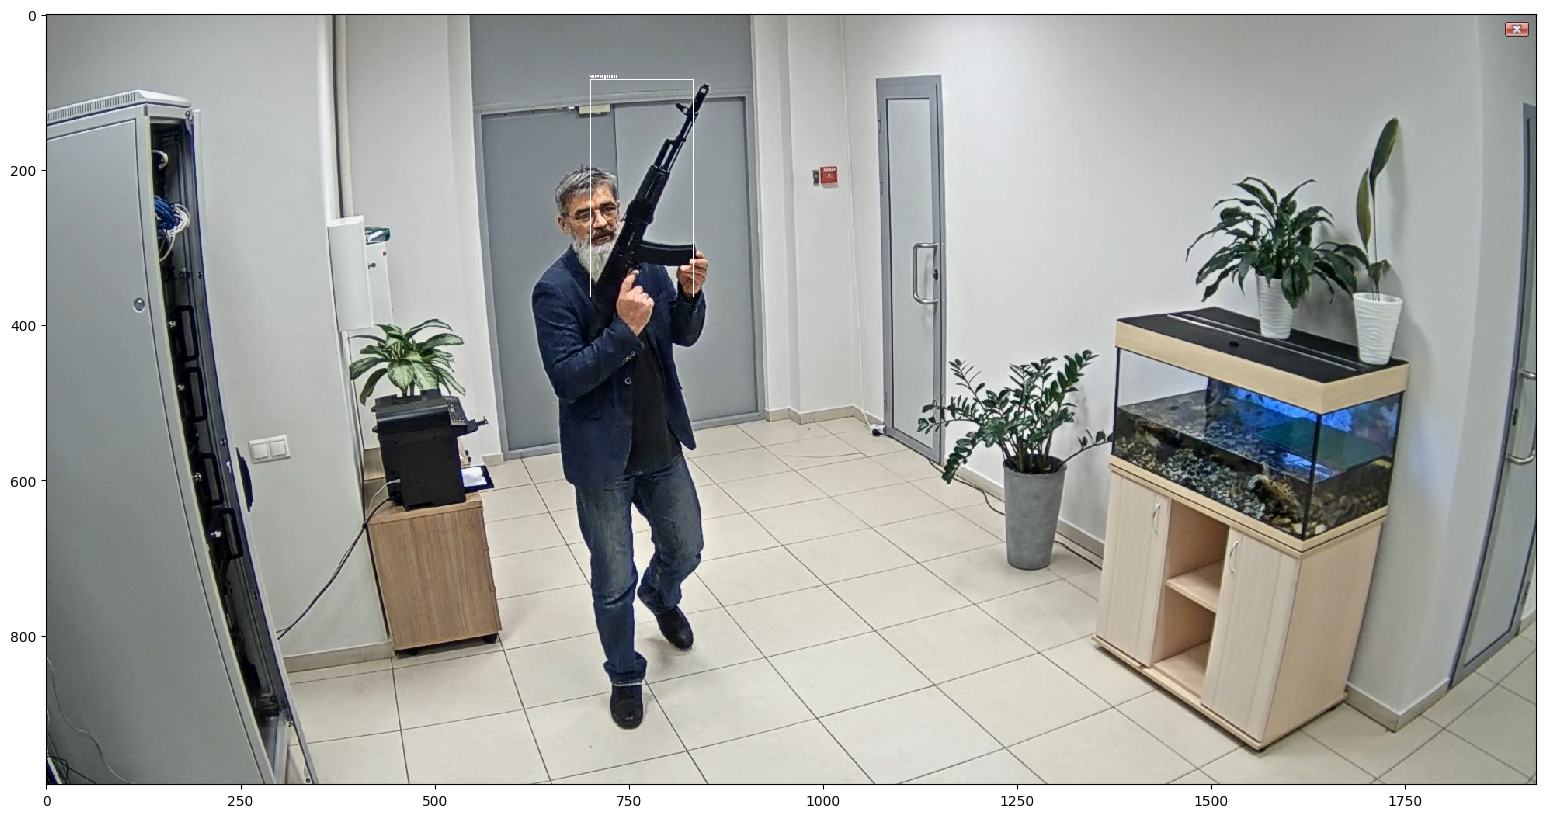

In [20]:

class_name_to_id_mapping = {"weapon": 0,}

random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)


    w, h = image.size

    plotted_image = ImageDraw.Draw(image)


    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h

    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]


    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))

        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])

    plt.figure(figsize = (30,10))
    plt.imshow(np.array(image), interpolation='nearest')
    plt.show()

annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]


image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
assert os.path.exists(image_file)


image = Image.open(image_file)

plot_bounding_box(image, annotation_list)

In [21]:

%cd ./yolov5

/content/yolov5


In [ ]:


#                img size  |  model config                               batch size|num of epochs |           dataset       | weights for model               |   name of model
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 16 --epochs 50 --data /content/custom.yaml --weights yolov5s.pt --workers 24 --name yolo_weapon_det

2024-03-07 08:40:25.654825: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 08:40:25.654902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 08:40:25.657110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/custom.yaml, hyp=hyp.scratch-med.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls

In [ ]:
!python detect.py --source /content/drive/MyDrive/weapon_data/images/test --weights /content/best.pt --conf 0.25 --name yolo_weapon_det

In [ ]:
import cv2

from google.colab.patches import cv2_imshow

In [ ]:
import os

print(os.path.exists('/content/yolov5/runs/train/yolo_weapon_det3/'))

In [ ]:
detections_dir = "/content/yolov5/runs/train/yolo_weapon_det3/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

pr='/content/yolov5/runs/train/yolo_weapon_det3/P_curve.png'

i=cv2.imread(pr, cv2.IMREAD_UNCHANGED)
cv2_imshow(i)



In [ ]:
cm='/content/yolov5/runs/train/yolo_weapon_det3/confusion_matrix.png'
j=cv2.imread(cm, cv2.IMREAD_UNCHANGED)
cv2_imshow(j)

In [ ]:
tb0='/content/yolov5/runs/train/yolo_weapon_det3/train_batch0.jpg'
k=cv2.imread(tb0, cv2.IMREAD_UNCHANGED)
cv2_imshow(k)

In [ ]:
tb1='/content/yolov5/runs/train/yolo_weapon_det3/train_batch1.jpg'
l=cv2.imread(tb1, cv2.IMREAD_UNCHANGED)
cv2_imshow(l)

In [ ]:
tb2='/content/yolov5/runs/train/yolo_weapon_det3/train_batch2.jpg'
o=cv2.imread(tb2, cv2.IMREAD_UNCHANGED)
cv2_imshow(o)

In [ ]:

print('test results:')
!python val.py --weights /content/yolov5/runs/train/yolo_weapon_det3/weights/best.pt --data /content/yolov5/data/custom.yaml --task test --name yolo_weapon_det_test